In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)

In [3]:
spec_file = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_file[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: 0934210201_M29grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.756e-03 +/- 6.358e-04 (72.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.003e+04 sec
 Using fit statistic: chi
 Using Background File                0934210201_M29spec_bkg.fits
  Background Exposure Time: 1.003e+04 sec
 Using Response (RMF) File            0934210201_M29spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0934210201_M29spec.arf



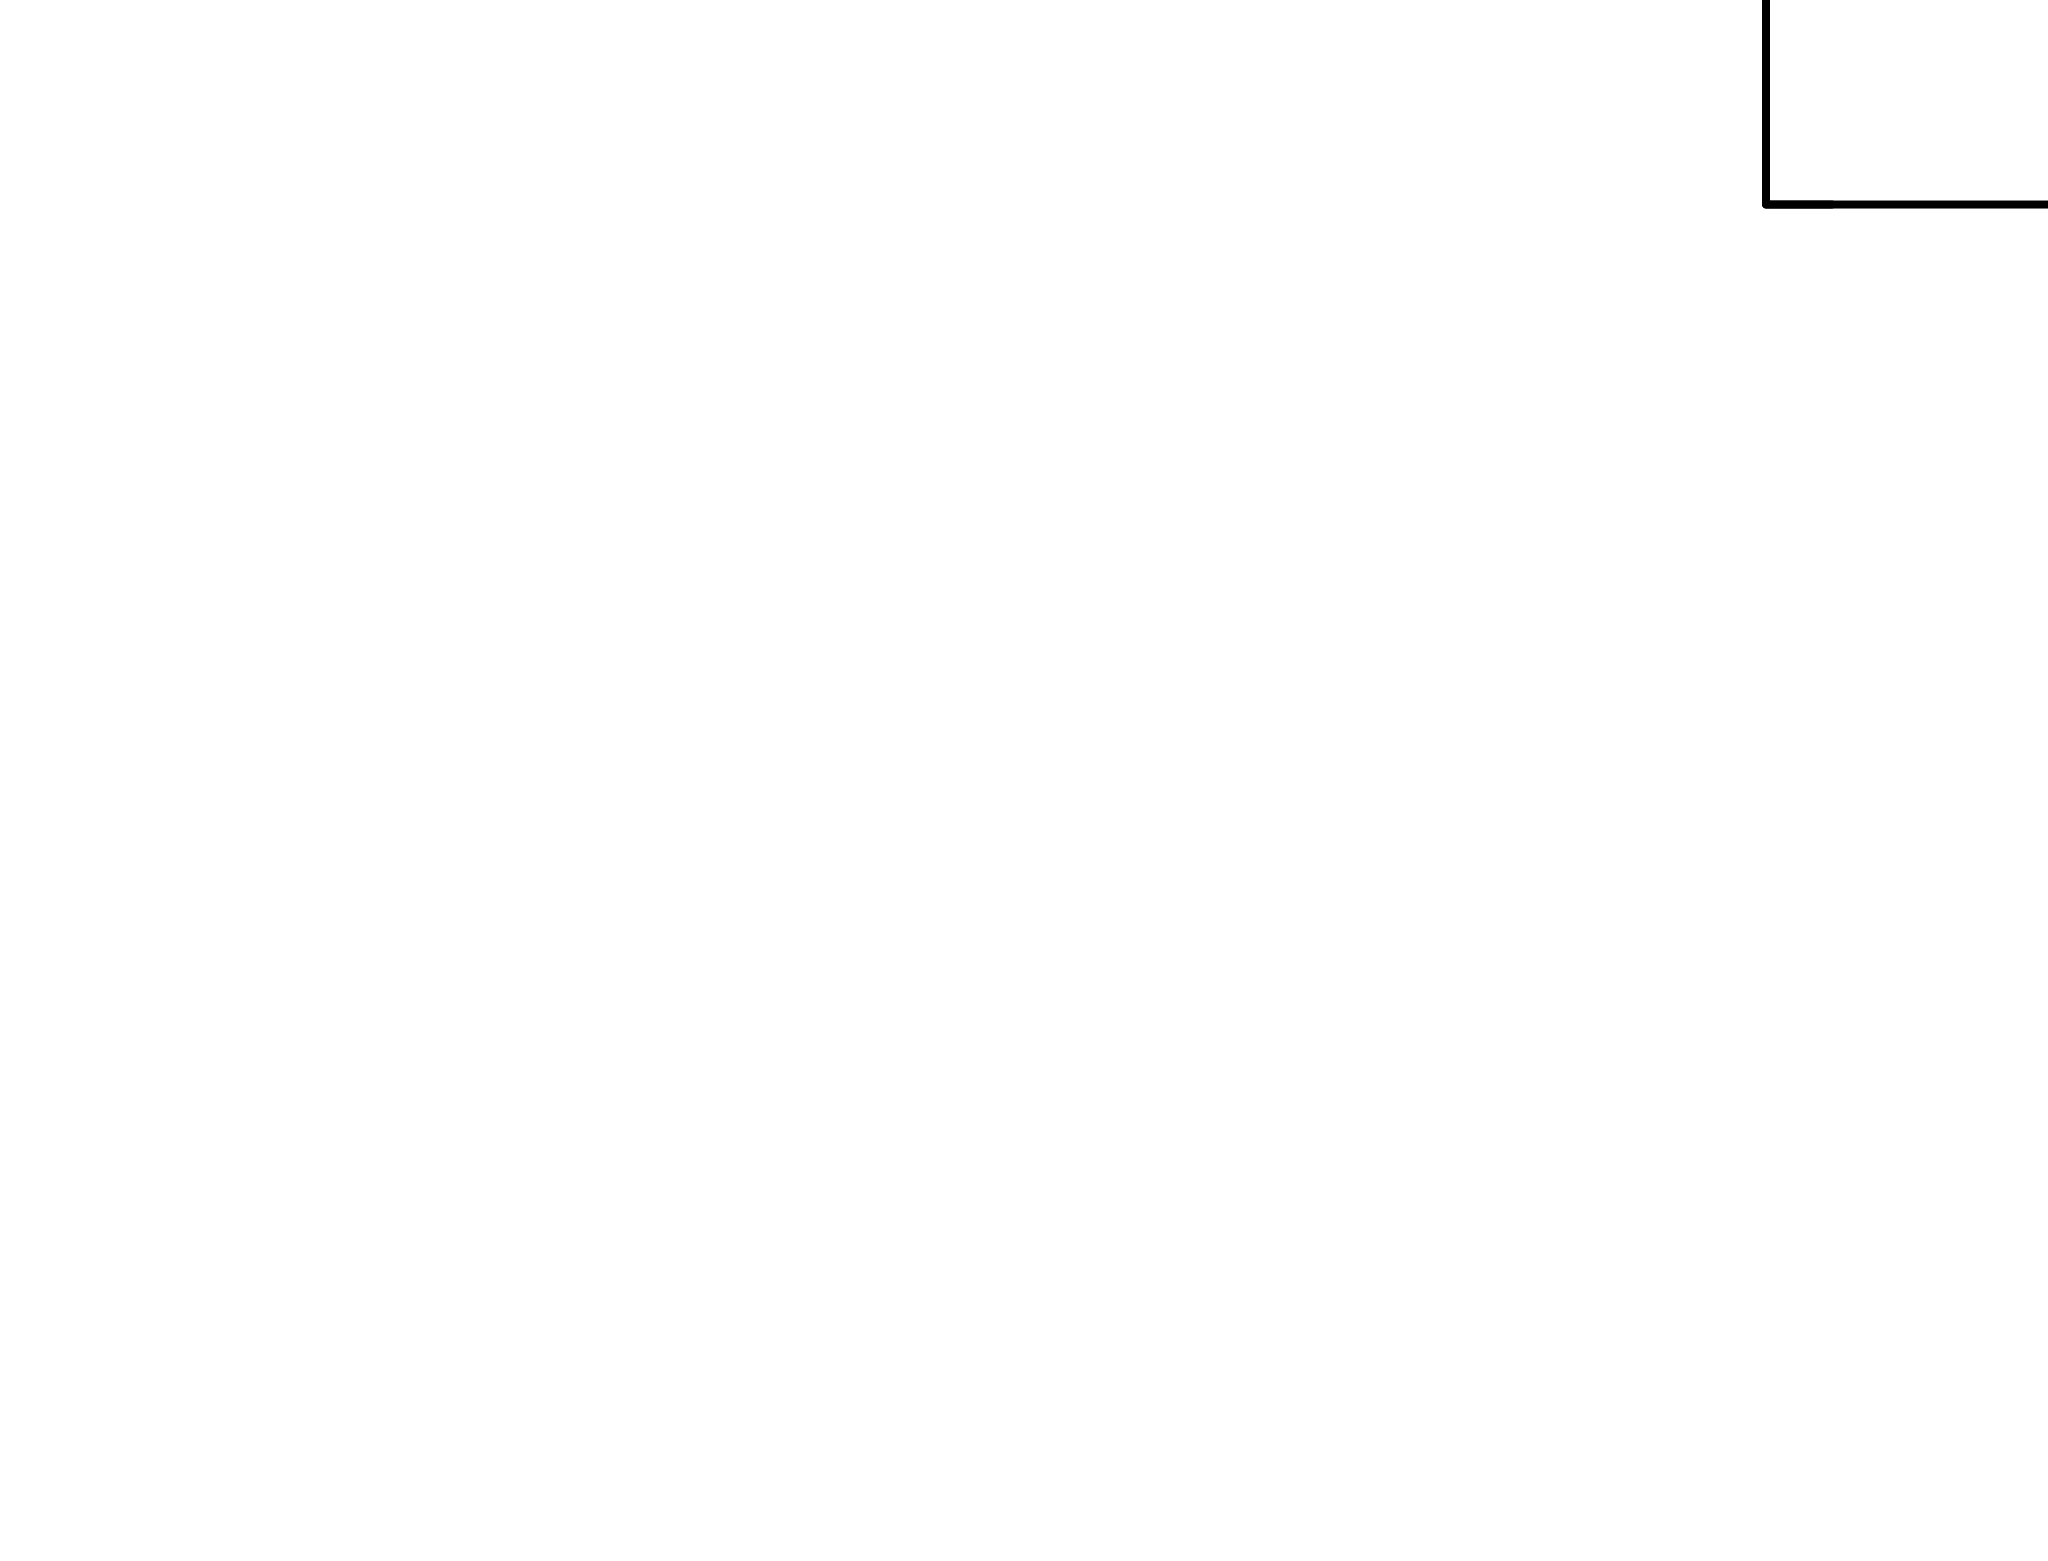

In [4]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              7.647162e+10     using 7 bins.



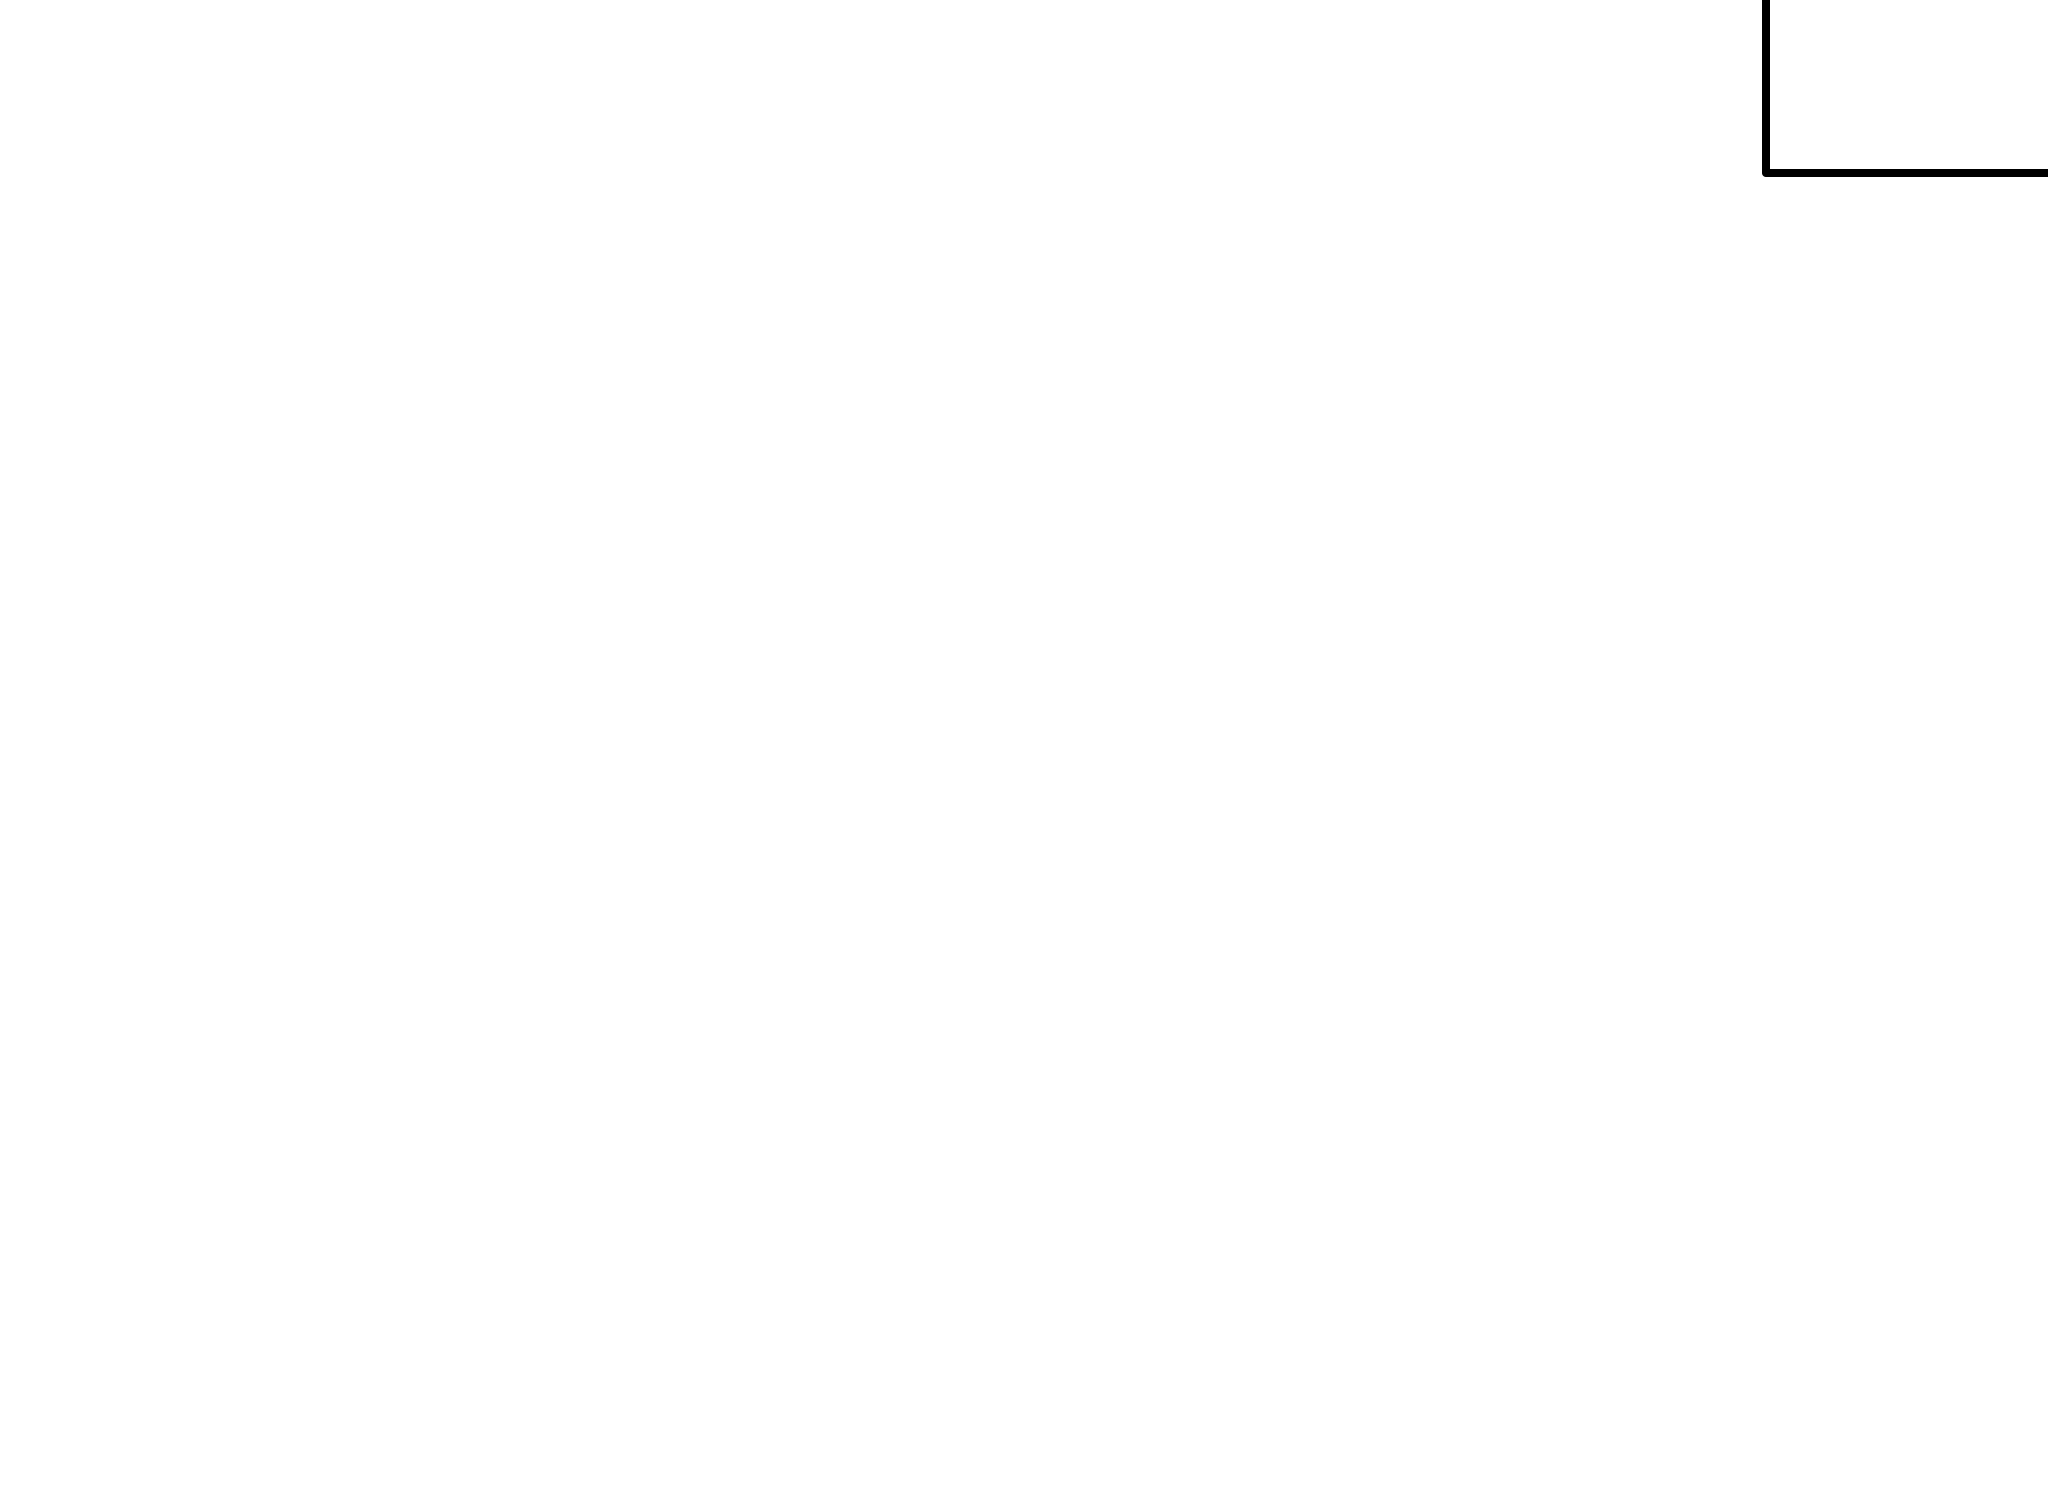

In [5]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [6]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 0
Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Apparent non-monotonicity in statistic space detected.
Current bracket values 1.70484, 18.8328
and delta stat 0, 3.3346
but latest trial 16.5008 gives 4.12034
Suggest that you check this result using the steppar command.
     1            0      10.2688    (-1.70484,8.56398)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before convergence.
Current trial values 0.107618, 0.107578
and delt


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.448439e+10     using 7 bins.

Test statistic : Chi-Squared              1.448439e+10     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
3.87688      0.812824     -2       1.14936       21.9709   2.67305e-05
1.54448      49630.3      -3       1.52759       74.8247   4.89445e-05
1.26458      13125.1      -4       1.69757       83.9447   5.86719e-05
1.2

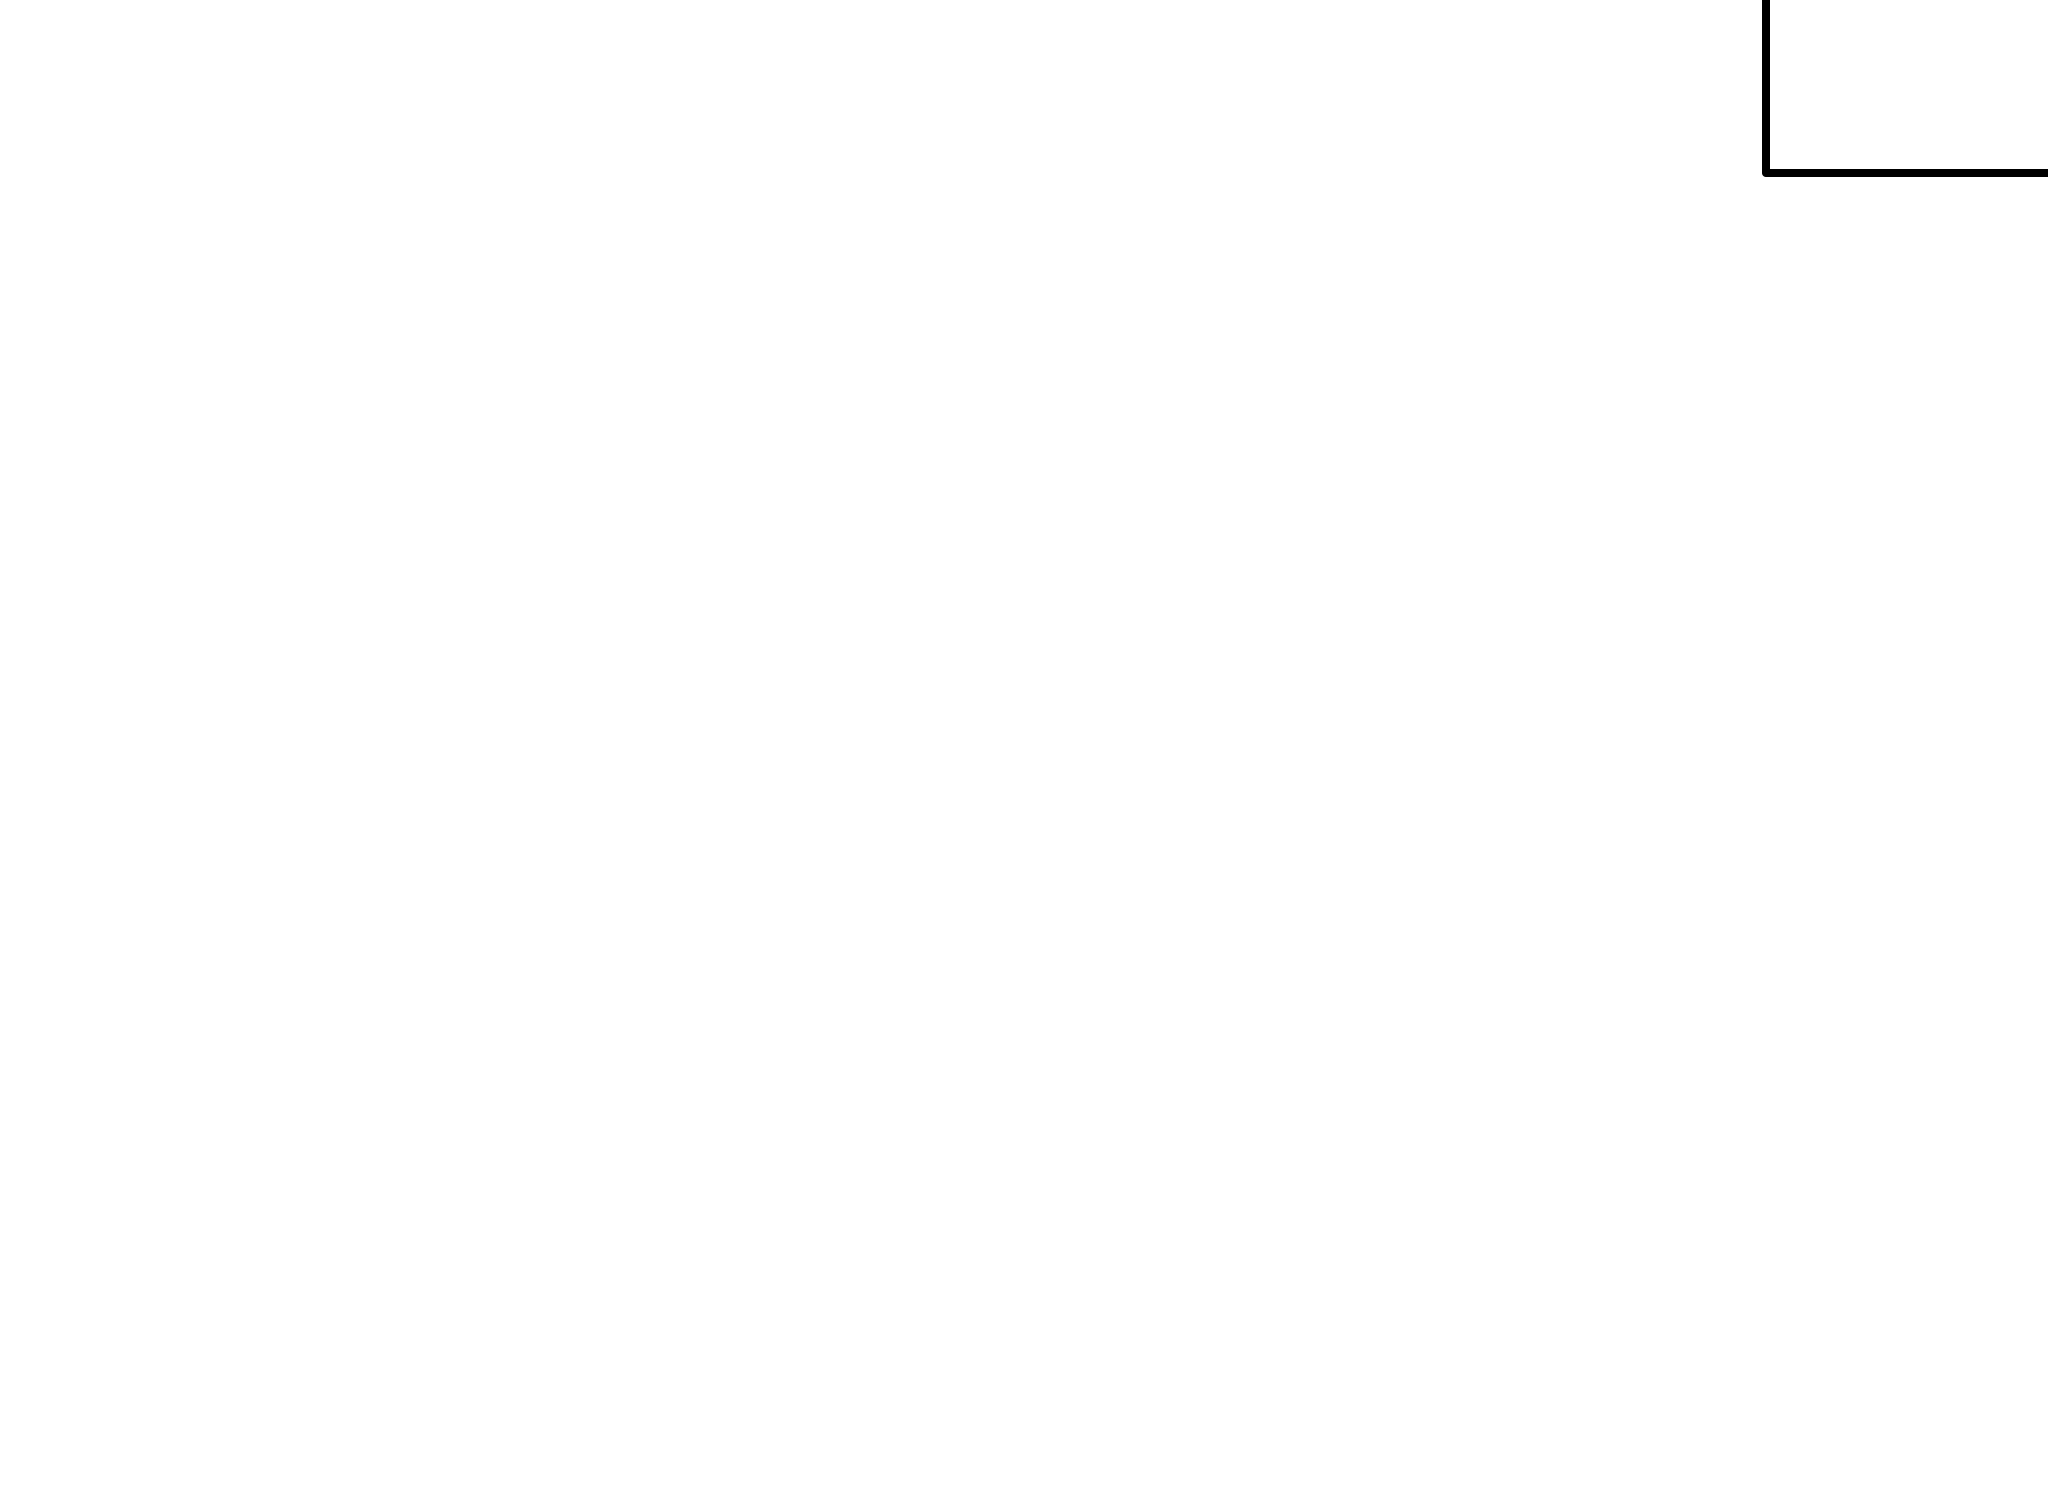

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [8]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? 
***Warning: Number of trials exceeded before convergence.
Current trial values 11.3439, 11.3445
and delta statistic 2.69127, 3.00941

Continue error se


***XSPEC Error:  No variable parameters for fit 


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              4.449467e+09     using 7 bins.

Test statistic : Chi-Squared              4.449467e+09     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
15.2374      1.21657      -3      0.377244       7.40397   1.2

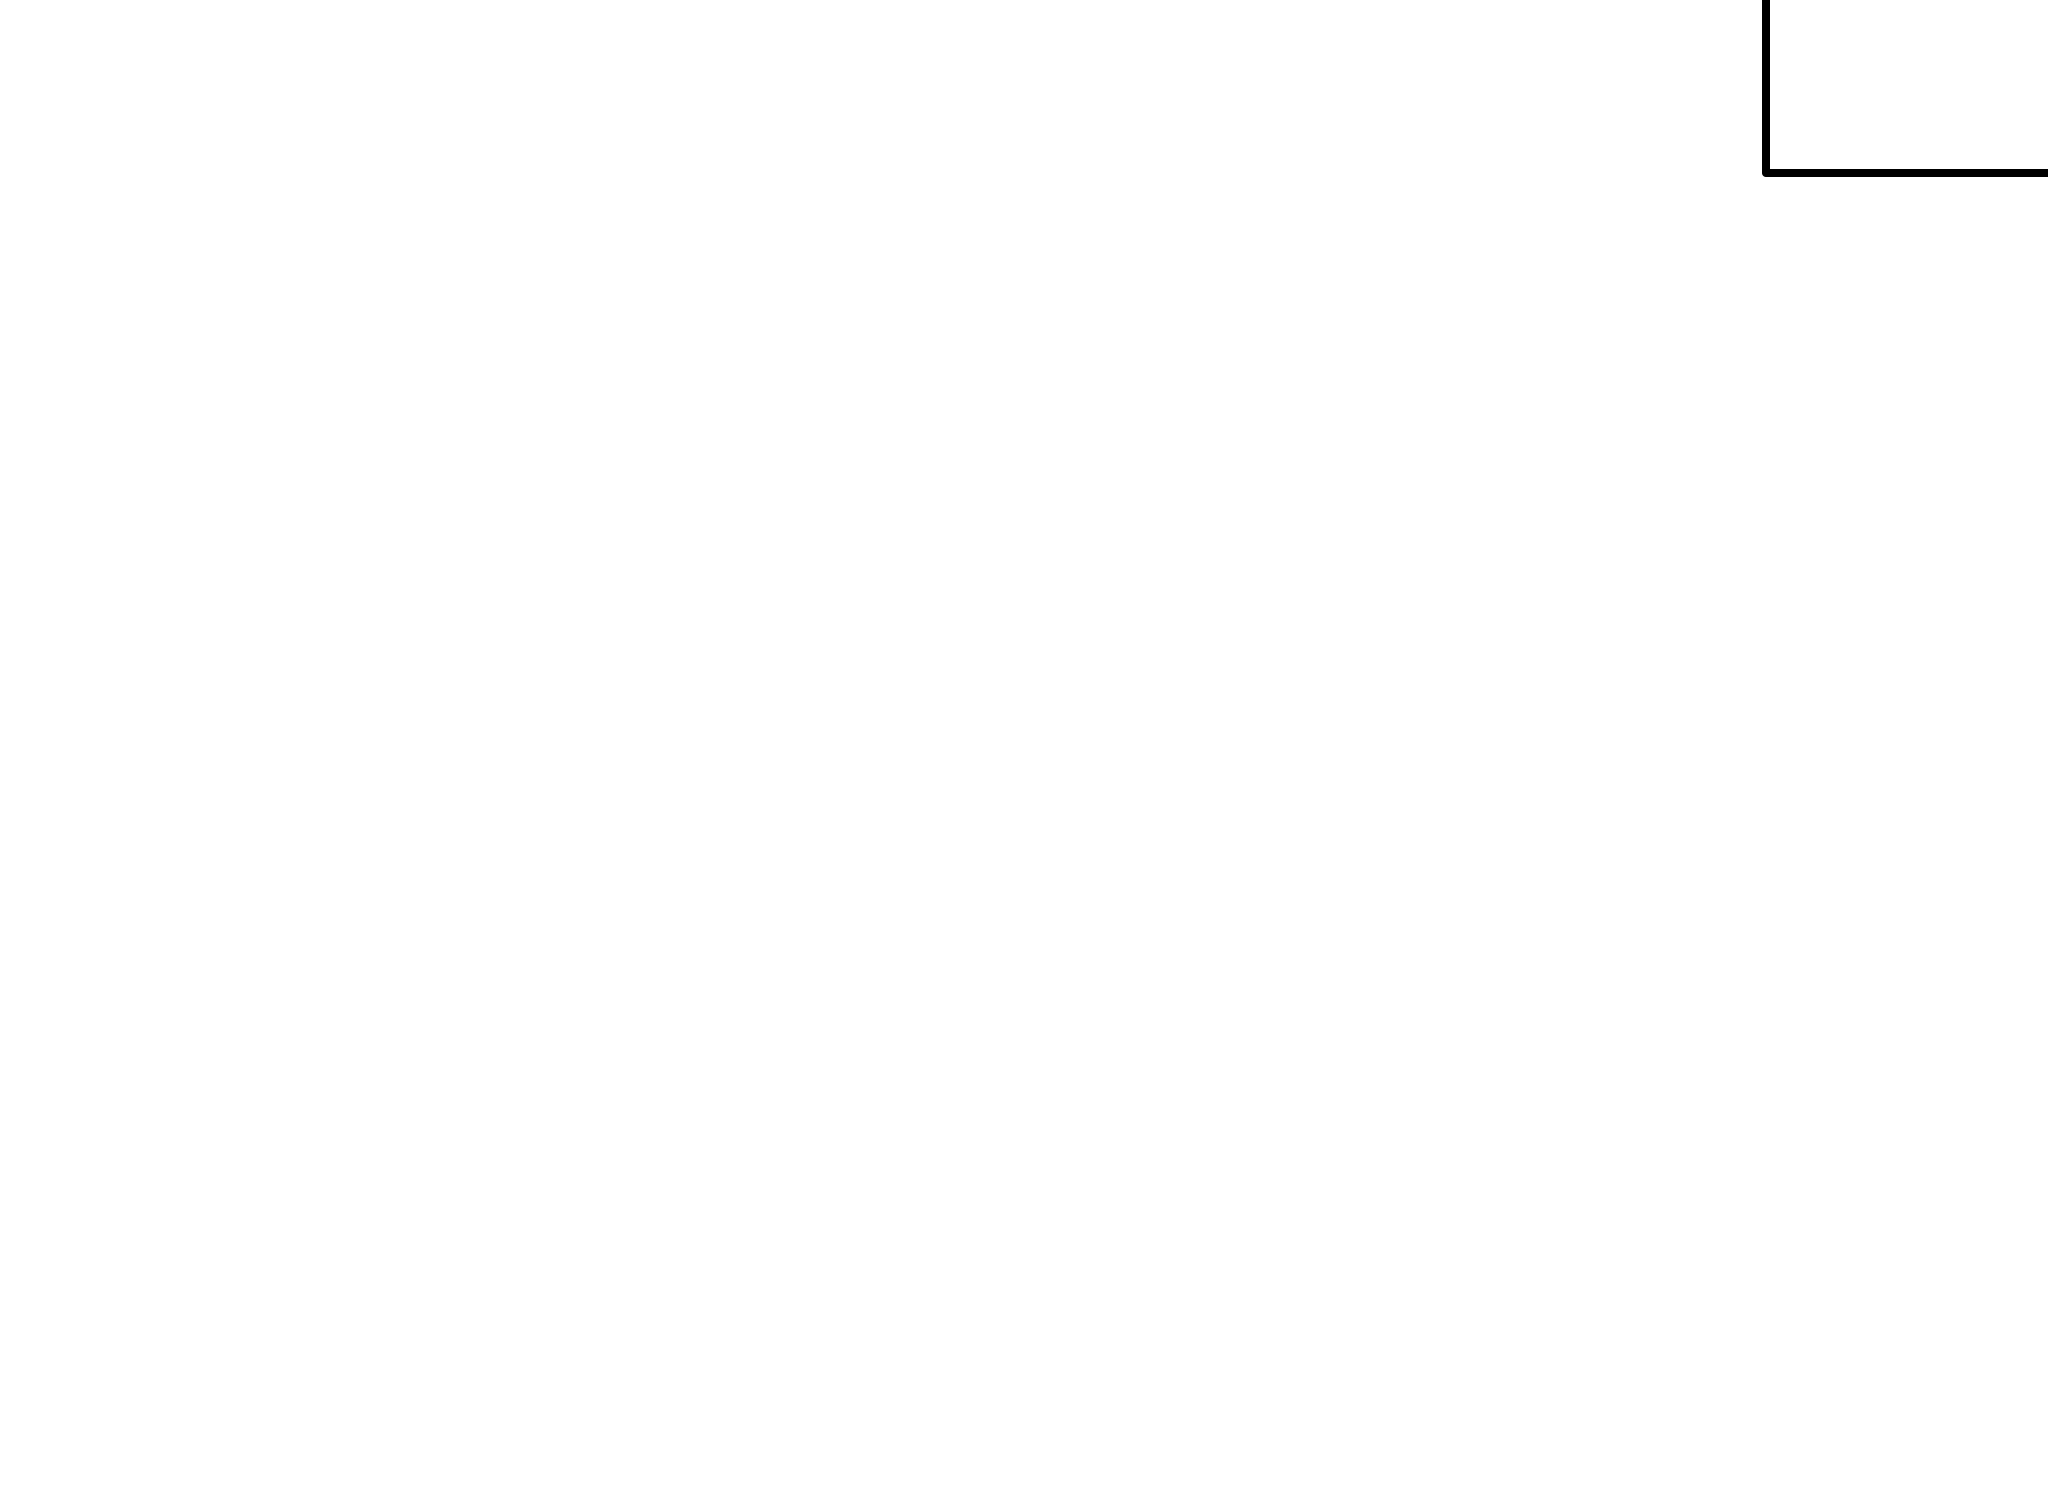

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [10]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting?      1     0.617726      13.3959    (-1.12152,11.6566)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 64
     2     0.901791            0    (-59.5514,-60.4532)



Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.771087e+11     using 7 bins.

Test statistic : Chi-Squared              2.771087e+11     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
2.13212      0.407848     -2      0.298607       1.76915   3.50274e-06
1.57588      427307       -3      0.610272       1.30347   1.71595e-06
0.979212     535097       -4      0.714848       1.35369   2.19522e-06
0.97

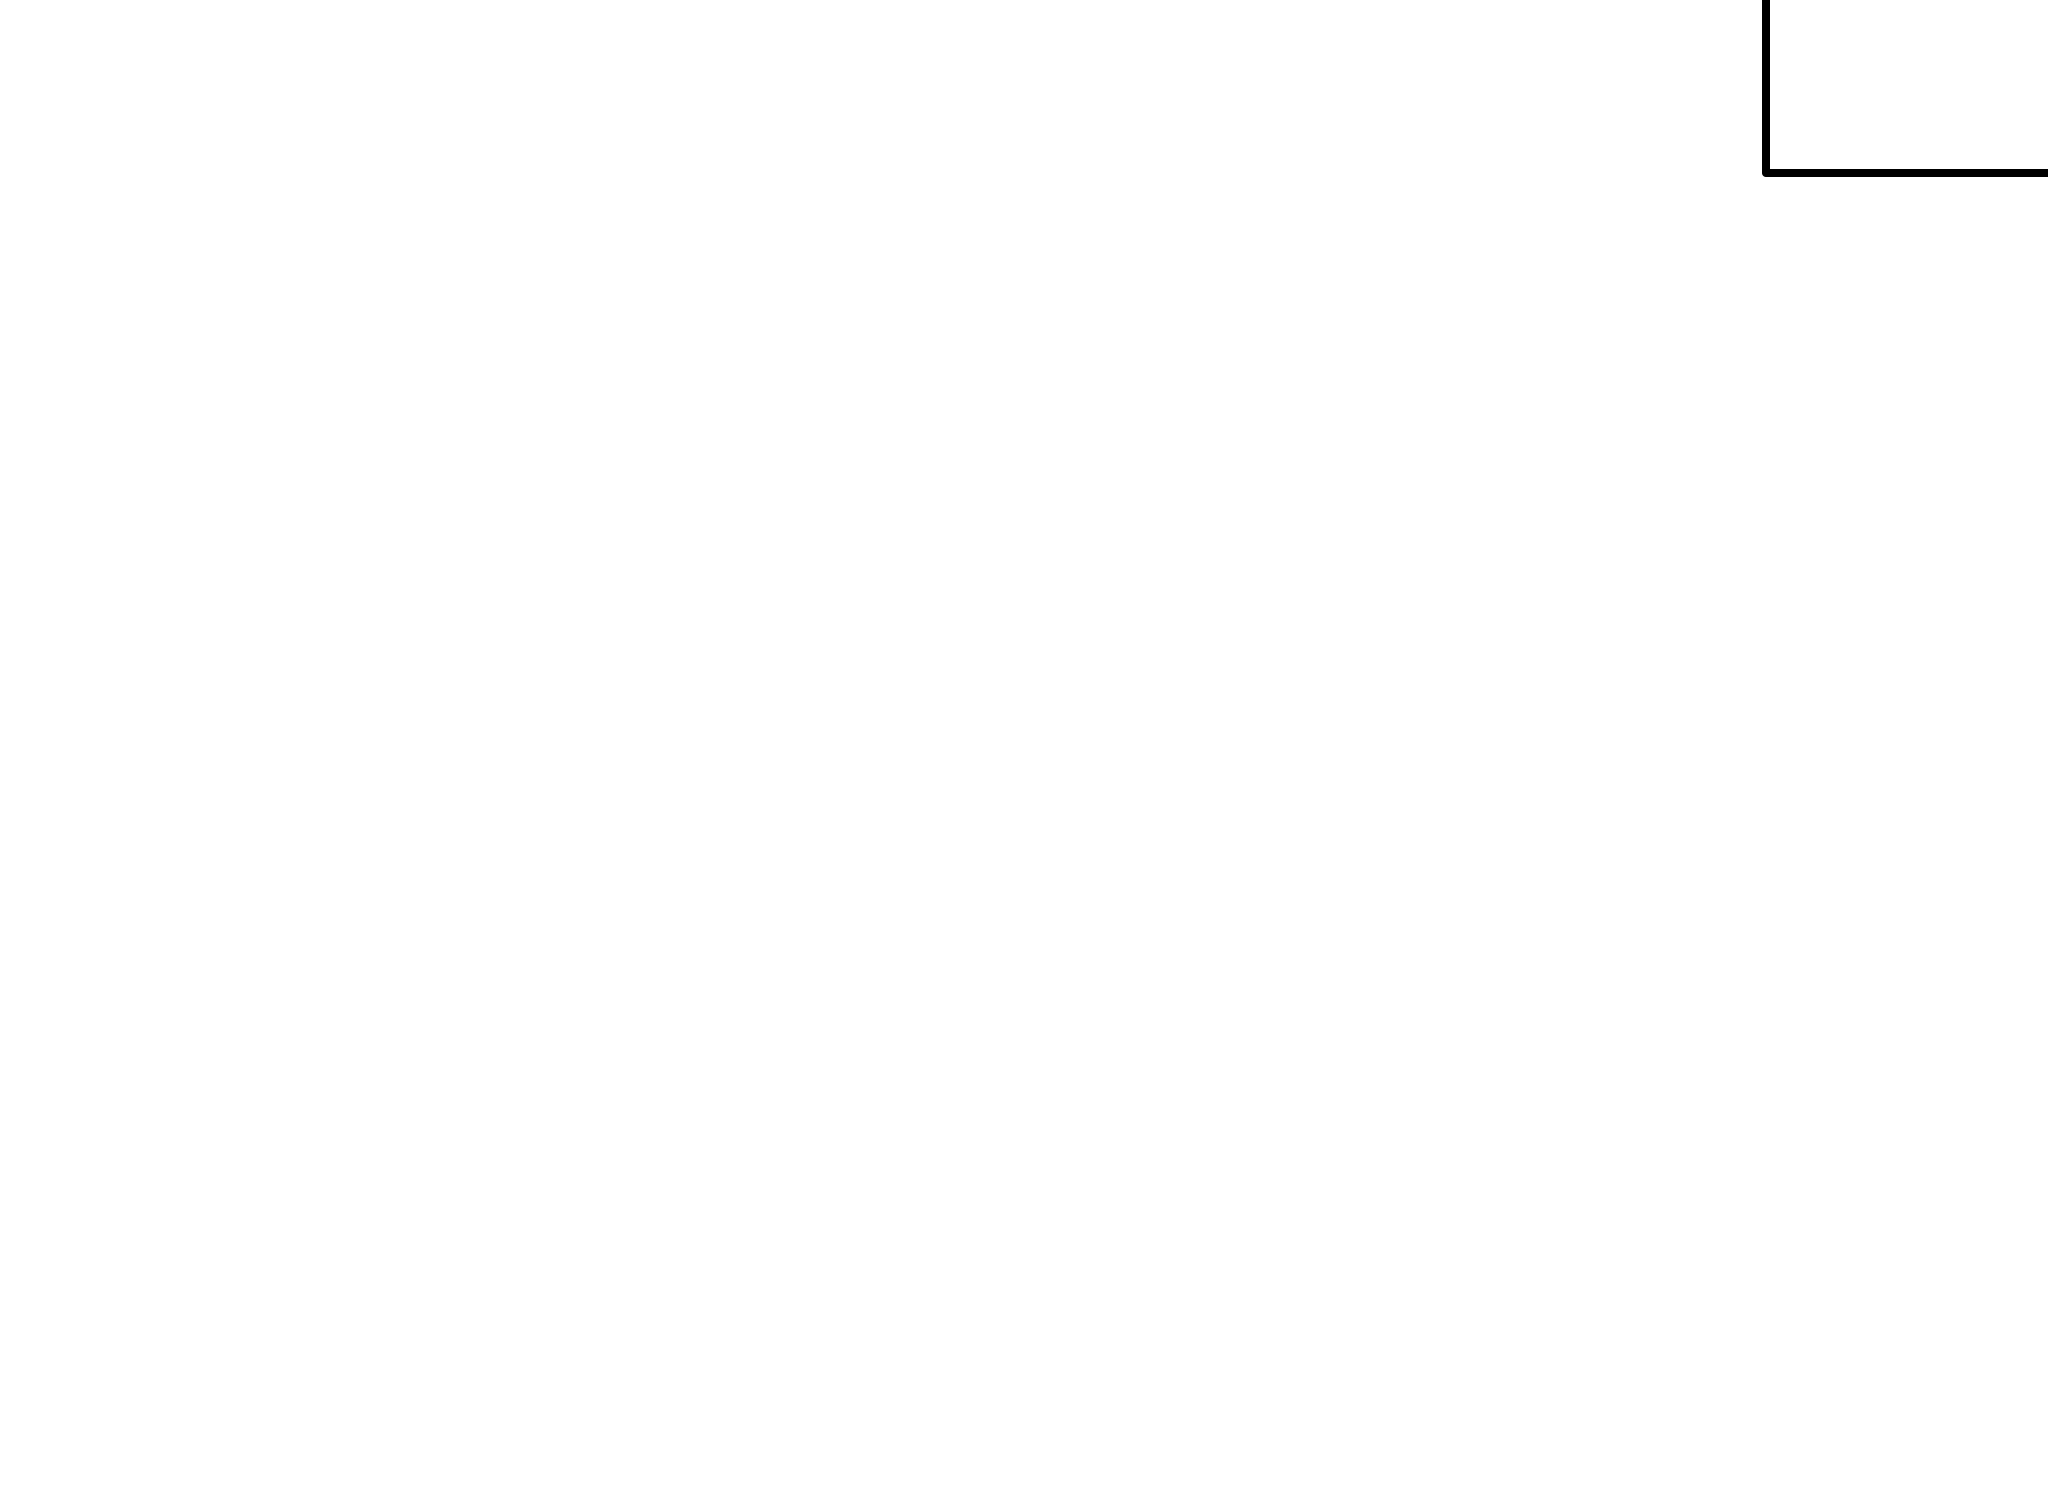

In [11]:
#spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [12]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 0
     1            0       7.8467    (-0.710628,7.13607)
 Parameter   Confidence Range (2.706)
     2     0.588319      3.18621    (-0.752735,1.84515)


Exception: Error: Python Model object reference no longer corresponds to
          an actual XSPEC model.

In [ ]:
np.savetxt('../spec68_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [ ]:
AllModels.calcFlux(".2 12.0")

In [ ]:
plx = 0.2744
d_kpc = 1/plx
F_x = 1.6234*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

In [ ]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

In [ ]:
F_opt = 1.05*10**-5 * 10**(-0.4*19.88)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))